# Introduction

Notebook to analyze the **False Negatives** Results for each model in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [21]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from modules.models_runner.tc_br_models_runner import TC_BR_Runner
from modules.utils import model_evaluator as m_eval
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm
from modules.utils import tokenizers as tok

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [22]:
models_runner_4 = TC_BR_Runner()

lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

oracle=fd.Tc_BR_Oracles.read_oracle_volunteers_df()

evaluator_4 = m_eval.ModelEvaluator(oracle)
evals_df_4 = evaluator_4.run_evaluator(models=[lsi_model_4,lda_model_4,bm25_model_4,w2v_model_4],
                                       top_values=[10,20,40], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleVolunteers.shape: (195, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Load Datasets

In [23]:
bugreports = fd.Datasets.read_selected_bugreports_df()
testcases = fd.Datasets.read_testcases_df()

SelectedBugReports.shape: (91, 18)
TestCases.shape: (195, 12)


### Tokenization

In [24]:
tokenizer = tok.PorterStemmerBased_Tokenizer()
bugreports['tokens'] = bugreports.apply(lambda row : tokenizer.__call__(row['br_desc']), axis=1)
testcases['tokens'] = testcases.apply(lambda row : tokenizer.__call__(row['tc_desc']), axis=1)

### Results

In [25]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_10_cosine_0.0,33.08,23.46,26.09,precision recall fscore Bug_Number BR_1248267_SRC 0.6 0.193548 0.292683 BR_1248268_SRC 0.3 0.500000 0.375000 BR_1257087_SRC 0.0 0.000000 0.000000 BR_1264988_SRC 1.0 0.769231 0.869565 BR_1267480_SRC 0.0 0.000000 0.000000 BR_1267501_SRC 0.0 0.000000 0.000000 BR_1269348_SRC 0.0 0...,0.0,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR_1257087_SRC BR_1264988_SRC \ tc_name TC_13_TRG 0 0 0 1 TC_14_TRG 0 0 0 1 TC_15_TRG 0 0 0 1 TC_16_...
1,lsi,top_10_cosine_0.1,33.08,23.46,26.09,precision recall fscore Bug_Number BR_1248267_SRC 0.6 0.193548 0.292683 BR_1248268_SRC 0.3 0.500000 0.375000 BR_1257087_SRC 0.0 0.000000 0.000000 BR_1264988_SRC 1.0 0.769231 0.869565 BR_1267480_SRC 0.0 0.000000 0.000000 BR_1267501_SRC 0.0 0.000000 0.000000 BR_1269348_SRC 0.0 0...,0.1,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR_1257087_SRC BR_1264988_SRC \ tc_name TC_13_TRG 0 0 0 1 TC_14_TRG 0 0 0 1 TC_15_TRG 0 0 0 1 TC_16_...
2,lsi,top_10_cosine_0.2,33.08,23.46,26.09,precision recall fscore Bug_Number BR_1248267_SRC 0.6 0.193548 0.292683 BR_1248268_SRC 0.3 0.500000 0.375000 BR_1257087_SRC 0.0 0.000000 0.000000 BR_1264988_SRC 1.0 0.769231 0.869565 BR_1267480_SRC 0.0 0.000000 0.000000 BR_1267501_SRC 0.0 0.000000 0.000000 BR_1269348_SRC 0.0 0...,0.2,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR_1257087_SRC BR_1264988_SRC \ tc_name TC_13_TRG 0 0 0 1 TC_14_TRG 0 0 0 1 TC_15_TRG 0 0 0 1 TC_16_...
3,lsi,top_10_cosine_0.3,33.08,23.46,26.09,precision recall fscore Bug_Number BR_1248267_SRC 0.6 0.193548 0.292683 BR_1248268_SRC 0.3 0.500000 0.375000 BR_1257087_SRC 0.0 0.000000 0.000000 BR_1264988_SRC 1.0 0.769231 0.869565 BR_1267480_SRC 0.0 0.000000 0.000000 BR_1267501_SRC 0.0 0.000000 0.000000 BR_1269348_SRC 0.0 0...,0.3,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR_1257087_SRC BR_1264988_SRC \ tc_name TC_13_TRG 0 0 0 1 TC_14_TRG 0 0 0 1 TC_15_TRG 0 0 0 1 TC_16_...
4,lsi,top_10_cosine_0.4,32.99,23.28,25.97,precision recall fscore Bug_Number BR_1248267_SRC 0.600000 0.193548 0.292683 BR_1248268_SRC 0.222222 0.333333 0.266667 BR_1257087_SRC 0.000000 0.000000 0.000000 BR_1264988_SRC 1.000000 0.769231 0.869565 BR_1267480_SRC 0.000000 0.000000 0.000000 BR_1267501_SRC 0.000000 0.000000 0.000000 BR_1269348_SRC 0.000000 0...,0.4,10.0,br_name BR_1248267_SRC BR_1248268_SRC BR_1257087_SRC BR_1264988_SRC \ tc_name TC_13_TRG 0 0 0 1 TC_14_TRG 0 0 0 1 TC_15_TRG 0 0 0 1 TC_16_...


### Grouping Results by Model

#### Min Recall

model
bm25          14.20
lda            2.02
lsi            1.88
wordvector     3.61
Name: perc_recall, dtype: float64



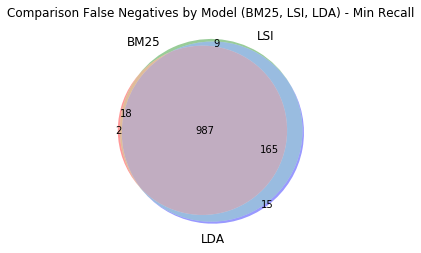

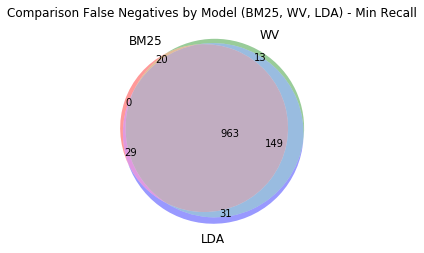

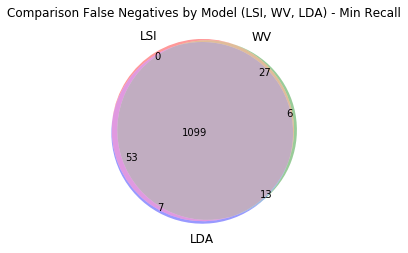

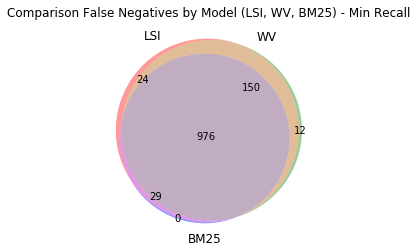

In [26]:
group = evals_df_4.groupby('model').perc_recall.min()
print(group)
print()

bm25_min_recall = group[group.index == 'bm25'].values[0]
lsi_min_recall = group[group.index == 'lsi'].values[0]
lda_min_recall = group[group.index == 'lda'].values[0]
wv_min_recall = group[group.index == 'wordvector'].values[0]

bm25_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_min_recall))
lsi_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_min_recall))
lda_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_min_recall))
wv_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_min_recall))

venn3([bm25_fn_set, lsi_fn_set, lda_fn_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Negatives by Model (BM25, LSI, LDA) - Min Recall')
plt.show()

venn3([bm25_fn_set, wv_fn_set, lda_fn_set], ['BM25','WV','LDA'])
plt.title('Comparison False Negatives by Model (BM25, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_fn_set, wv_fn_set, lda_fn_set], ['LSI','WV','LDA'])
plt.title('Comparison False Negatives by Model (LSI, WV, LDA) - Min Recall')
plt.show()

venn3([lsi_fn_set, wv_fn_set, bm25_fn_set], ['LSI','WV','BM25'])
plt.title('Comparison False Negatives by Model (LSI, WV, BM25) - Min Recall')
plt.show()

##### Exclusive Cases

In [27]:
print("BM25 Exclusive FN:")
bm25_exc_set = bm25_fn_set - lsi_fn_set - lda_fn_set - wv_fn_set
display(bm25_exc_set)

print("\n\nLSI Exclusive FN:")
lsi_exc_set = lsi_fn_set - bm25_fn_set - lda_fn_set - wv_fn_set
display(lsi_exc_set)

print("\n\nLDA Exclusive FN:")
lda_exc_set = lda_fn_set - lsi_fn_set - bm25_fn_set - wv_fn_set
display(lda_exc_set)

print("\n\nWV Exclusive FN:")
wv_exc_set = wv_fn_set - lda_fn_set - lsi_fn_set - bm25_fn_set
display(wv_exc_set)

BM25 Exclusive FN:


set()



LSI Exclusive FN:


set()



LDA Exclusive FN:


{('TC_105_TRG', 'BR_1300738_SRC'),
 ('TC_14_TRG', 'BR_1294733_SRC'),
 ('TC_14_TRG', 'BR_1294887_SRC'),
 ('TC_75_TRG', 'BR_1248267_SRC'),
 ('TC_76_TRG', 'BR_1248267_SRC'),
 ('TC_77_TRG', 'BR_1248267_SRC'),
 ('TC_93_TRG', 'BR_1248267_SRC')}



WV Exclusive FN:


{('TC_154_TRG', 'BR_1292566_SRC'),
 ('TC_164_TRG', 'BR_1292566_SRC'),
 ('TC_170_TRG', 'BR_1292566_SRC'),
 ('TC_18_TRG', 'BR_1357458_SRC')}

#### Max Recall

model
bm25          32.54
lda           35.17
lsi           46.99
wordvector    12.62
Name: perc_recall, dtype: float64



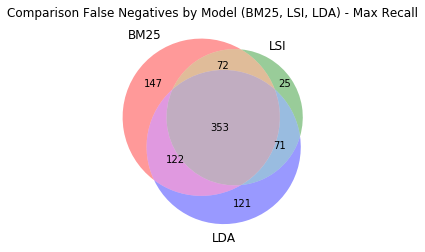

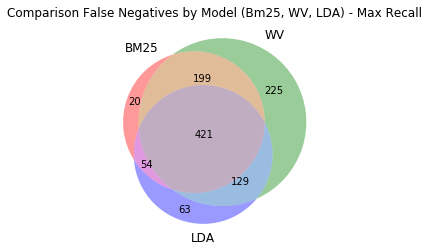

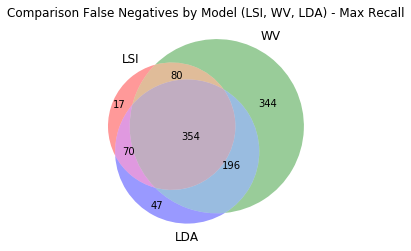

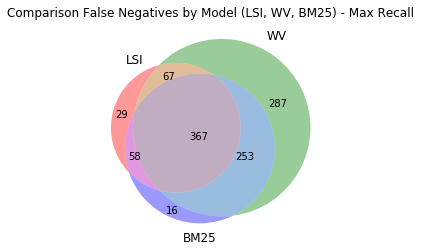

In [28]:
group = evals_df_4.groupby('model').perc_recall.max()
print(group)
print()

bm25_max_recall = group[group.index == 'bm25'].values[0]
lsi_max_recall = group[group.index == 'lsi'].values[0]
lda_max_recall = group[group.index == 'lda'].values[0]
wv_max_recall = group[group.index == 'wordvector'].values[0]

bm25_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_recall=bm25_max_recall))
lsi_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_recall=lsi_max_recall))
lda_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_recall=lda_max_recall))
wv_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_recall=wv_max_recall))

venn3([bm25_fn_set, lsi_fn_set, lda_fn_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Negatives by Model (BM25, LSI, LDA) - Max Recall')
plt.show()

venn3([bm25_fn_set, wv_fn_set, lda_fn_set], ['BM25','WV','LDA'])
plt.title('Comparison False Negatives by Model (Bm25, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_fn_set, wv_fn_set, lda_fn_set], ['LSI','WV','LDA'])
plt.title('Comparison False Negatives by Model (LSI, WV, LDA) - Max Recall')
plt.show()

venn3([lsi_fn_set, wv_fn_set, bm25_fn_set], ['LSI','WV','BM25'])
plt.title('Comparison False Negatives by Model (LSI, WV, BM25) - Max Recall')
plt.show()

##### Exclusive Cases

In [29]:
print("BM25 Exclusive FN:")
bm25_exc_set = bm25_fn_set - lsi_fn_set - lda_fn_set - wv_fn_set
#display(bm25_exc_set)
print("len(bm25_exc_set): {}".format(len(bm25_exc_set)))

print("\n\nLSI Exclusive FN:")
lsi_exc_set = lsi_fn_set - bm25_fn_set - lda_fn_set - wv_fn_set
#display(lsi_exc_set)
print("len(lsi_exc_set): {}".format(len(lsi_exc_set)))

print("\n\nLDA Exclusive FN:")
lda_exc_set = lda_fn_set - lsi_fn_set - bm25_fn_set - wv_fn_set
#display(lda_exc_set)
print("len(lda_exc_set): {}".format(len(lda_exc_set)))

print("\n\nWV Exclusive FN:")
wv_exc_set = wv_fn_set - lda_fn_set - lsi_fn_set - bm25_fn_set
#display(wv_exc_set)
print("len(wv_exc_set): {}".format(len(wv_exc_set)))

BM25 Exclusive FN:
len(bm25_exc_set): 9


LSI Exclusive FN:
len(lsi_exc_set): 6


LDA Exclusive FN:
len(lda_exc_set): 40


WV Exclusive FN:
len(wv_exc_set): 206


##### Word Clouds

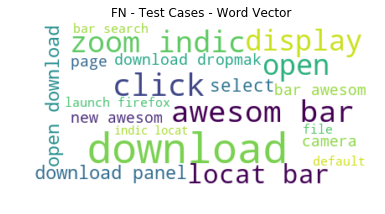

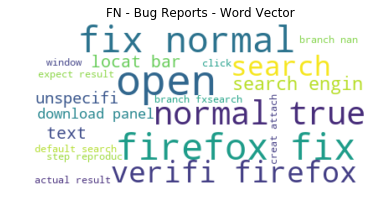

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [39]:
aux_functions.create_wordcloud_tc_br(wv_exc_set, bugreports=bugreports, testcases=testcases,
                                    wc_tc_title="FN - Test Cases - Word Vector",
                                    wc_br_title="FN - Bug Reports - Word Vector")

aux_functions.create_wordcloud_tc_br(bm25_exc_set, bugreports=bugreports, testcases=testcases,
                                    wc_tc_title="FN - Test Cases - BM25",
                                    wc_br_title="FN - Bug Reports - BM25")

aux_functions.create_wordcloud_tc_br(lsi_exc_set, bugreports=bugreports, testcases=testcases,
                                    wc_tc_title="FN - Test Cases - LSI",
                                   wc_br_title="FN - Bug Reports - LSI")

aux_functions.create_wordcloud_tc_br(lda_exc_set, bugreports=bugreports, testcases=testcases,
                                    wc_tc_title="FN - Test Cases - LDA",
                                    wc_br_title="FN - Bug Reports - LDA")


In [31]:
print("LSI FN Amount: {}".format(len(lsi_fn_set)))
print("LDA FN Amount: {}".format(len(lda_fn_set)))
print("BM25 FN Amount: {}".format(len(bm25_fn_set)))
print("WV FN Amount: {}".format(len(wv_fn_set)))

LSI FN Amount: 521
LDA FN Amount: 667
BM25 FN Amount: 694
WV FN Amount: 974


##### Detailing Features for Exclusive Sets

In [32]:
aux_functions.detail_features_tc_br(bm25_exc_set, bugreports=bugreports, testcases=testcases)
aux_functions.detail_features_tc_br(lda_exc_set, bugreports=bugreports, testcases=testcases)
aux_functions.detail_features_tc_br(lsi_exc_set, bugreports=bugreports, testcases=testcases)
aux_functions.detail_features_tc_br(wv_exc_set, bugreports=bugreports, testcases=testcases)

,tc,tc_feat,br,br_summary
0,TC_74_TRG,Context Menu,BR_1248267_SRC,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu"
1,TC_92_TRG,Context Menu,BR_1289240_SRC,"Services.search.getDefaultEngines() empty, search engine reset triggered when using a language pack"
2,TC_78_TRG,Context Menu,BR_1248267_SRC,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu"
3,TC_83_TRG,Context Menu,BR_1299458_SRC,Telemetry data from Search bar is not properly collected when searching in new tab from context menu
4,TC_95_TRG,Context Menu,BR_1248267_SRC,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu"
5,TC_92_TRG,Context Menu,BR_1299458_SRC,Telemetry data from Search bar is not properly collected when searching in new tab from context menu
6,TC_89_TRG,Context Menu,BR_1299458_SRC,Telemetry data from Search bar is not properly collected when searching in new tab from context menu
7,TC_85_TRG,Context Menu,BR_1313969_SRC,"[Follow-up] Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab"
8,TC_13_TRG,New Awesome Bar,BR_1309856_SRC,Fix bookmarks twisty direction in RTL locales on Mac OS X


,tc,tc_feat,br,br_summary
0,TC_187_TRG,Indicator for device permissions,BR_1290424_SRC,"Mouse-over (hover) on a dropdown suggestion (search, URL) causes the hovered-over item to be deleted on 'delete'-press"
1,TC_94_TRG,Context Menu,BR_1299458_SRC,Telemetry data from Search bar is not properly collected when searching in new tab from context menu
2,TC_88_TRG,Context Menu,BR_1299458_SRC,Telemetry data from Search bar is not properly collected when searching in new tab from context menu
3,TC_193_TRG,Indicator for device permissions,BR_1290424_SRC,"Mouse-over (hover) on a dropdown suggestion (search, URL) causes the hovered-over item to be deleted on 'delete'-press"
4,TC_14_TRG,New Awesome Bar,BR_1365887_SRC,Can't open resource:///modules/ from the location bar
5,TC_14_TRG,New Awesome Bar,BR_1291770_SRC,"[HiDPI] Globe icon is too small, ends up being scaled up"
6,TC_100_TRG,Context Menu,BR_1289240_SRC,"Services.search.getDefaultEngines() empty, search engine reset triggered when using a language pack"
7,TC_98_TRG,Context Menu,BR_1289240_SRC,"Services.search.getDefaultEngines() empty, search engine reset triggered when using a language pack"
8,TC_185_TRG,Indicator for device permissions,BR_1290424_SRC,"Mouse-over (hover) on a dropdown suggestion (search, URL) causes the hovered-over item to be deleted on 'delete'-press"
9,TC_190_TRG,Indicator for device permissions,BR_1296322_SRC,X button is vertically misaligned on the permission dropdown


,tc,tc_feat,br,br_summary
0,TC_59_TRG,Browser Customization,BR_1357458_SRC,After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar
1,TC_100_TRG,Context Menu,BR_1313969_SRC,"[Follow-up] Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab"
2,TC_122_TRG,WebGL Compatibility,BR_1312018_SRC,Keyword search is always performed in lowercase
3,TC_99_TRG,Context Menu,BR_1313969_SRC,"[Follow-up] Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab"
4,TC_162_TRG,Downloads Dropmaker,BR_1432915_SRC,Do not write the kMDItemWhereFroms xattr metadata for files downloaded in Private Browsing mode
5,TC_88_TRG,Context Menu,BR_1313969_SRC,"[Follow-up] Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab"


,tc,tc_feat,br,br_summary
0,TC_13_TRG,New Awesome Bar,BR_1296366_SRC,"Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab"
1,TC_13_TRG,New Awesome Bar,BR_1294733_SRC,Awesomebar search buttons show auto completed text not user input
2,TC_13_TRG,New Awesome Bar,BR_1352539_SRC,Move defaultenginename pref setting into list.json
3,TC_59_TRG,Browser Customization,BR_1313290_SRC,Use browser specific message manager in `SocialShare.sharePage`
4,TC_18_TRG,New Awesome Bar,BR_1297976_SRC,[One-off searches] Screen reader does not read the one-offs searches buttons
5,TC_117_TRG,Text to Speech in Reader Mode,BR_1357458_SRC,After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar
6,TC_161_TRG,Downloads Dropmaker,BR_1292566_SRC,"The ""open"" button in the subview for temporarily blocked downloads should not ask for confirmation"
7,TC_181_TRG,Indicator for device permissions,BR_1296322_SRC,X button is vertically misaligned on the permission dropdown
8,TC_17_TRG,New Awesome Bar,BR_1357458_SRC,After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar
9,TC_191_TRG,Indicator for device permissions,BR_1345687_SRC,[Regression] Clicking on audioVideoButton / sharing-icon don't work when typed on urlbar


#### Min Precision

model
bm25          14.04
lda            4.23
lsi            9.07
wordvector     6.21
Name: perc_precision, dtype: float64



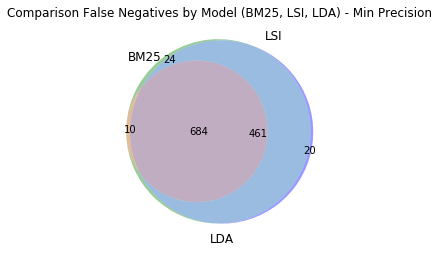

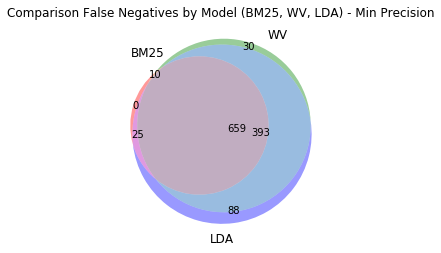

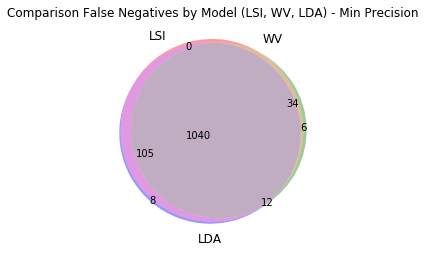

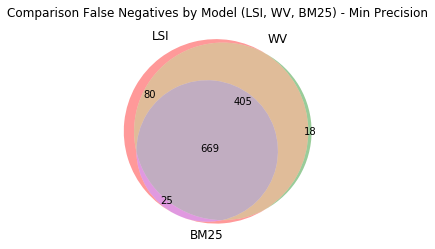

In [33]:
group = evals_df_4.groupby('model').perc_precision.min()
print(group)
print()

bm25_min_prec = group[group.index == 'bm25'].values[0]
lsi_min_prec = group[group.index == 'lsi'].values[0]
lda_min_prec = group[group.index == 'lda'].values[0]
wv_min_prec = group[group.index == 'wordvector'].values[0]

bm25_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_min_prec))
lsi_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_min_prec))
lda_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_min_prec))
wv_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_min_prec))

venn3([bm25_fn_set, lsi_fn_set, lda_fn_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Negatives by Model (BM25, LSI, LDA) - Min Precision')
plt.show()

venn3([bm25_fn_set, wv_fn_set, lda_fn_set], ['BM25','WV','LDA'])
plt.title('Comparison False Negatives by Model (BM25, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_fn_set, wv_fn_set, lda_fn_set], ['LSI','WV','LDA'])
plt.title('Comparison False Negatives by Model (LSI, WV, LDA) - Min Precision')
plt.show()

venn3([lsi_fn_set, wv_fn_set, bm25_fn_set], ['LSI','WV','BM25'])
plt.title('Comparison False Negatives by Model (LSI, WV, BM25) - Min Precision')
plt.show()

##### Exclusive Cases

In [34]:
print("BM25 Exclusive FN:")
bm25_exc_set = bm25_fn_set - lsi_fn_set - lda_fn_set - wv_fn_set
display(bm25_exc_set)

print("\n\nLSI Exclusive FN:")
lsi_exc_set = lsi_fn_set - bm25_fn_set - lda_fn_set - wv_fn_set
display(lsi_exc_set)

print("\n\nLDA Exclusive FN:")
lda_exc_set = lda_fn_set - lsi_fn_set - bm25_fn_set - wv_fn_set
display(lda_exc_set)

print("\n\nWV Exclusive FN:")
wv_exc_set = wv_fn_set - lda_fn_set - lsi_fn_set - bm25_fn_set
display(wv_exc_set)

BM25 Exclusive FN:


set()



LSI Exclusive FN:


set()



LDA Exclusive FN:


{('TC_105_TRG', 'BR_1300738_SRC'),
 ('TC_106_TRG', 'BR_1300738_SRC'),
 ('TC_14_TRG', 'BR_1294733_SRC'),
 ('TC_14_TRG', 'BR_1294887_SRC'),
 ('TC_75_TRG', 'BR_1248267_SRC'),
 ('TC_76_TRG', 'BR_1248267_SRC'),
 ('TC_77_TRG', 'BR_1248267_SRC'),
 ('TC_93_TRG', 'BR_1248267_SRC')}



WV Exclusive FN:


{('TC_154_TRG', 'BR_1292566_SRC'),
 ('TC_156_TRG', 'BR_1292566_SRC'),
 ('TC_164_TRG', 'BR_1292566_SRC'),
 ('TC_165_TRG', 'BR_1292566_SRC'),
 ('TC_170_TRG', 'BR_1292566_SRC'),
 ('TC_18_TRG', 'BR_1357458_SRC')}

In [35]:
print("LSI FN Amount: {}".format(len(lsi_fn_set)))
print("LDA FN Amount: {}".format(len(lda_fn_set)))
print("BM25 FN Amount: {}".format(len(bm25_fn_set)))
print("WV FN Amount: {}".format(len(wv_fn_set)))

LSI FN Amount: 1179
LDA FN Amount: 1165
BM25 FN Amount: 694
WV FN Amount: 1092


#### Max Precision

model
bm25          21.21
lda           20.57
lsi           33.80
wordvector     6.85
Name: perc_precision, dtype: float64



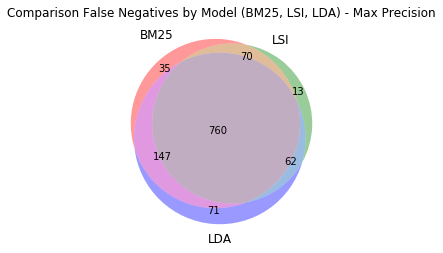

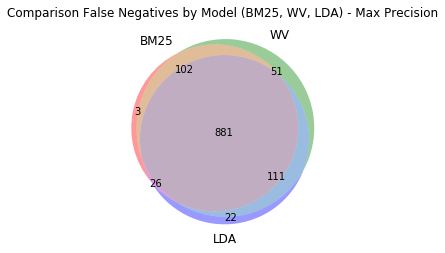

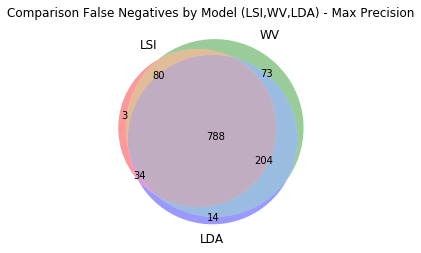

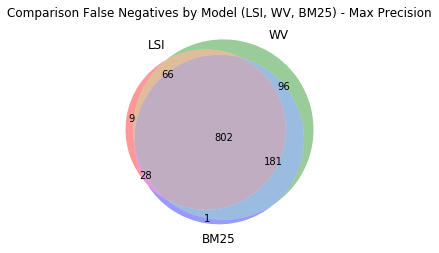

In [36]:
group = evals_df_4.groupby('model').perc_precision.max()
print(group)
print()

bm25_max_prec = group[group.index == 'bm25'].values[0]
lsi_max_prec = group[group.index == 'lsi'].values[0]
lda_max_prec = group[group.index == 'lda'].values[0]
wv_max_prec = group[group.index == 'wordvector'].values[0]

bm25_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='bm25', perc_precision=bm25_max_prec))
lsi_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lsi', perc_precision=lsi_max_prec))
lda_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='lda', perc_precision=lda_max_prec))
wv_fn_set = aux_functions.get_false_negatives(oracle, aux_functions.get_trace_links_df(evaluations_df=evals_df_4, model='wordvector', perc_precision=wv_max_prec))

venn3([bm25_fn_set, lsi_fn_set, lda_fn_set], ['BM25','LSI','LDA'])
plt.title('Comparison False Negatives by Model (BM25, LSI, LDA) - Max Precision')
plt.show()

venn3([bm25_fn_set, wv_fn_set, lda_fn_set], ['BM25','WV','LDA'])
plt.title('Comparison False Negatives by Model (BM25, WV, LDA) - Max Precision')
plt.show()

venn3([lsi_fn_set, wv_fn_set, lda_fn_set], ['LSI','WV','LDA'])
plt.title('Comparison False Negatives by Model (LSI,WV,LDA) - Max Precision')
plt.show()

venn3([lsi_fn_set, wv_fn_set, bm25_fn_set], ['LSI','WV','BM25'])
plt.title('Comparison False Negatives by Model (LSI, WV, BM25) - Max Precision')
plt.show()

##### Exclusive Cases

In [37]:
print("BM25 Exclusive FN:")
bm25_exc_set = bm25_fn_set - lsi_fn_set - lda_fn_set - wv_fn_set
display(bm25_exc_set)

print("\n\nLSI Exclusive FN:")
lsi_exc_set = lsi_fn_set - bm25_fn_set - lda_fn_set - wv_fn_set
display(lsi_exc_set)

print("\n\nLDA Exclusive FN:")
lda_exc_set = lda_fn_set - lsi_fn_set - bm25_fn_set - wv_fn_set
display(lda_exc_set)

print("\n\nWV Exclusive FN:")
wv_exc_set = wv_fn_set - lda_fn_set - lsi_fn_set - bm25_fn_set
display(wv_exc_set)

BM25 Exclusive FN:


set()



LSI Exclusive FN:


set()



LDA Exclusive FN:


{('TC_14_TRG', 'BR_1279864_SRC'),
 ('TC_14_TRG', 'BR_1294733_SRC'),
 ('TC_14_TRG', 'BR_1294887_SRC'),
 ('TC_14_TRG', 'BR_1301421_SRC'),
 ('TC_14_TRG', 'BR_1328913_SRC'),
 ('TC_14_TRG', 'BR_1335992_SRC'),
 ('TC_14_TRG', 'BR_1352539_SRC'),
 ('TC_14_TRG', 'BR_1353831_SRC'),
 ('TC_183_TRG', 'BR_1345687_SRC'),
 ('TC_195_TRG', 'BR_1345687_SRC'),
 ('TC_205_TRG', 'BR_1305195_SRC'),
 ('TC_88_TRG', 'BR_1299458_SRC'),
 ('TC_93_TRG', 'BR_1248267_SRC')}



WV Exclusive FN:


{('TC_106_TRG', 'BR_1300738_SRC'),
 ('TC_13_TRG', 'BR_1297374_SRC'),
 ('TC_13_TRG', 'BR_1335992_SRC'),
 ('TC_13_TRG', 'BR_1352539_SRC'),
 ('TC_144_TRG', 'BR_1365887_SRC'),
 ('TC_145_TRG', 'BR_1365887_SRC'),
 ('TC_148_TRG', 'BR_1365887_SRC'),
 ('TC_154_TRG', 'BR_1287384_SRC'),
 ('TC_154_TRG', 'BR_1292566_SRC'),
 ('TC_157_TRG', 'BR_1292573_SRC'),
 ('TC_158_TRG', 'BR_1287384_SRC'),
 ('TC_15_TRG', 'BR_1294733_SRC'),
 ('TC_15_TRG', 'BR_1294887_SRC'),
 ('TC_15_TRG', 'BR_1297374_SRC'),
 ('TC_15_TRG', 'BR_1352539_SRC'),
 ('TC_15_TRG', 'BR_1353831_SRC'),
 ('TC_164_TRG', 'BR_1292566_SRC'),
 ('TC_165_TRG', 'BR_1287384_SRC'),
 ('TC_169_TRG', 'BR_1287384_SRC'),
 ('TC_16_TRG', 'BR_1353831_SRC'),
 ('TC_16_TRG', 'BR_1357458_SRC'),
 ('TC_170_TRG', 'BR_1287384_SRC'),
 ('TC_170_TRG', 'BR_1292566_SRC'),
 ('TC_17_TRG', 'BR_1305737_SRC'),
 ('TC_180_TRG', 'BR_1345687_SRC'),
 ('TC_181_TRG', 'BR_1345687_SRC'),
 ('TC_189_TRG', 'BR_1345687_SRC'),
 ('TC_18_TRG', 'BR_1294733_SRC'),
 ('TC_18_TRG', 'BR_1294887_SRC')

In [38]:
print("LSI FN Amount: {}".format(len(lsi_fn_set)))
print("LDA FN Amount: {}".format(len(lda_fn_set)))
print("BM25 FN Amount: {}".format(len(bm25_fn_set)))
print("WV FN Amount: {}".format(len(wv_fn_set)))

LSI FN Amount: 905
LDA FN Amount: 1040
BM25 FN Amount: 1012
WV FN Amount: 1145
